In [1]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np
import math
import pandas as pd
import scipy.io
from scipy.signal import hilbert
from scipy.stats import linregress
# Load the .mat file
mat_data = scipy.io.loadmat('RIR_data.mat')
# Access the variables in the .mat file
RIR = mat_data['data']

In [2]:
df = pd.DataFrame(RIR)
s = df.iloc[:, 5]
df.head()
s.head()

0    [[3.619337e-07], [-4.3745402e-07], [7.2463126e...
1    [[-2.243695e-07], [-3.1340218e-07], [-8.395956...
2    [[-3.6142697e-07], [1.2704496e-07], [1.6632393...
3    [[2.7667548e-07], [3.0945247e-07], [3.3485364e...
4    [[-8.945427e-07], [3.9572706e-07], [-2.5114636...
Name: 5, dtype: object

In [3]:
column_names = ['I', 'N', 'A', 'C,', 'f', 'Q']
df = pd.DataFrame(RIR, columns=column_names)
#print(df)
df

,I,N,A,"C,",f,Q
0,[BLS-Chnolab],[BLS-Chnolab_SDM_5LS_ListeningTest.mat],"[[0.0, 0.0, 1.41]]",[A],"[[1.76, 1.84, 1.41]]","[[3.619337e-07], [-4.3745402e-07], [7.2463126e..."
1,[BLS-Chnolab],[BLS-Chnolab_SDM_5LS_ListeningTest.mat],"[[0.0, 0.0, 1.41]]",[[[B]]],"[[-1.68, 3.6, 1.41]]","[[-2.243695e-07], [-3.1340218e-07], [-8.395956..."
2,[BLS-Chnolab],[BLS-Chnolab_SDM_5LS_ListeningTest.mat],"[[0.0, 0.0, 1.41]]",[[[C]]],"[[-1.23, 3.6, 1.41]]","[[-3.6142697e-07], [1.2704496e-07], [1.6632393..."
3,[BLS-Chnolab],[BLS-Chnolab_SDM_5LS_ListeningTest.mat],"[[0.0, 0.0, 1.41]]",[[[D]]],"[[1.27, 3.86, 1.41]]","[[2.7667548e-07], [3.0945247e-07], [3.3485364e..."
4,[BLS-Chnolab],[BLS-Chnolab_SDM_5LS_ListeningTest.mat],"[[0.0, 0.0, 1.41]]",[[[E]]],"[[0.0, 1.78, 1.41]]","[[-8.945427e-07], [3.9572706e-07], [-2.5114636..."
...,...,...,...,...,...,...
154,[ML2-102],[SDM_ML2-102_5LS_W.mat],"[[0, 0, 0]]",[L],"[[-1.0, 1.73, 0.0]]","[[-0.0], [1.7994028e-11], [1.2818804e-10], [-8..."
155,[ML2-102],[SDM_ML2-102_5LS_W.mat],"[[0, 0, 0]]",[R],"[[1.0, 1.73, 0.0]]","[[0.0], [-1.17689304e-11], [-2.2036235e-10], [..."
156,[ML2-102],[SDM_ML2-102_5LS_W.mat],"[[0, 0, 0]]",[C],"[[0, 2, 0]]","[[-0.0], [4.684049e-12], [-5.871651e-11], [1.0..."
157,[ML2-102],[SDM_ML2-102_5LS_W.mat],"[[0, 0, 0]]",[LS],"[[-1.88, -0.68, 0.0]]","[[0.0], [-1.3578737e-11], [4.9715357e-11], [2...."


In [6]:
import librosa
import numpy as np
import os
import soundfile as sf

# Assuming impulse_responses is a NumPy array or DataFrame column containing RIRs
impulse_responses = df['Q'].values
audio_folder = r'E:\tasks\audio data\audio data\sing-prediction-and-estimation-of-sound-field-in-rooms-umachine-learning-techniques-adafe35479227f1ccca42bdf01fb3389aaba66aa\audioData\classical'
output_folder = r'E:\tasks\Convolved_Audio_classical'

# Specify the indices you want to select
selected_indices = [5, 36, 62, 75, 90, 103, 116, 136, 143, 156]

# Ensure the selected indices are within the valid range
selected_indices = [i for i in selected_indices if i < len(impulse_responses)]

# Iterate through audio files in the specified folder
for audio_file_name in os.listdir(audio_folder):
    audio_file_path = os.path.join(audio_folder, audio_file_name)

    # Load the audio file
    y, sr = librosa.load(audio_file_path, sr=None)

    # Convolve the audio file with each selected impulse response
    for index in selected_indices:
        rir_data = impulse_responses[index]

        # Ensure rir_data is 1D
        rir_data = np.asarray(rir_data).flatten()

        # Convolve the audio signal with the RIR
        convolved_audio = np.convolve(y, rir_data, mode='full')[:len(y)]

        # Save the convolved audio to a file
        output_file_name = f"convolved_{index}_{audio_file_name}"
        output_file_path = os.path.join(output_folder, output_file_name)

        sf.write(output_file_path, convolved_audio, 48000, 'PCM_16')

        print(f"Convolved audio saved to: {output_file_path}")



Convolved audio saved to: E:\tasks\Convolved_Audio_classical\convolved_5_classical.00001.wav
Convolved audio saved to: E:\tasks\Convolved_Audio_classical\convolved_36_classical.00001.wav
Convolved audio saved to: E:\tasks\Convolved_Audio_classical\convolved_62_classical.00001.wav
Convolved audio saved to: E:\tasks\Convolved_Audio_classical\convolved_75_classical.00001.wav
Convolved audio saved to: E:\tasks\Convolved_Audio_classical\convolved_90_classical.00001.wav
Convolved audio saved to: E:\tasks\Convolved_Audio_classical\convolved_103_classical.00001.wav
Convolved audio saved to: E:\tasks\Convolved_Audio_classical\convolved_116_classical.00001.wav
Convolved audio saved to: E:\tasks\Convolved_Audio_classical\convolved_136_classical.00001.wav
Convolved audio saved to: E:\tasks\Convolved_Audio_classical\convolved_143_classical.00001.wav
Convolved audio saved to: E:\tasks\Convolved_Audio_classical\convolved_156_classical.00001.wav
Convolved audio saved to: E:\tasks\Convolved_Audio_class

In [5]:
import numpy as np
import pandas as pd
import glob
import os
from scipy.io import wavfile
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Reshape

# Load convolved audio data and impulse responses from DataFrame column
impulse_responses_column = df['Q']  # Replace with your column name
convolved_audio_folder = r'E:\tasks\Convolved_Audio_classical'

convolved_audio_files = glob.glob(os.path.join(convolved_audio_folder, '*.wav'))
convolved_audio_files.sort()

# Initialize arrays to store data
convolved_audio_data = []
impulse_response_data = impulse_responses_column.values  # Convert column to numpy array



In [6]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, BatchNormalization

from tensorflow.keras.optimizers import Adam

# Model setup with a specified learning rate
model = Sequential()
model.add(LSTM(16, input_shape=(661794, 1)))
model.add(Dense(1, activation='sigmoid'))
optimizer = Adam() 
model.compile(loss='mean_squared_error', optimizer=optimizer)

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16)                1152      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
import numpy as np

# Assuming your data is stored in a list of numpy arrays called data_list

# Combine all arrays into a single 2D numpy array
combined_data = np.concatenate(impulse_response_data, axis=0)

# Calculate the minimum and maximum values for each column
min_vals = np.min(combined_data, axis=0)
max_vals = np.max(combined_data, axis=0)

# Normalize each array in the list
normalized_data_list = [(array - min_vals) / (max_vals - min_vals) for array in impulse_response_data]

# Print or use normalized_data_list for training your mode
for normalized_array in normalized_data_list:
    print(normalized_array)

[[0.45491004]
 [0.4549053 ]
 [0.45491216]
 ...
 [0.45490688]
 [0.454907  ]
 [0.45490566]]
[[0.45490658]
 [0.45490605]
 [0.45490742]
 ...
 [0.4549081 ]
 [0.45490733]
 [0.45490724]]
[[0.45490575]
 [0.45490864]
 [0.45490885]
 ...
 [0.4549078 ]
 [0.4549076 ]
 [0.45490667]]
[[0.4549095 ]
 [0.45490974]
 [0.45490986]
 ...
 [0.45490876]
 [0.45490837]
 [0.45490864]]
[[0.45490262]
 [0.45491022]
 [0.4549064 ]
 ...
 [0.45490873]
 [0.4549081 ]
 [0.45490837]]
[[0.4549312 ]
 [0.4549037 ]
 [0.4549279 ]
 ...
 [0.45489973]
 [0.45490333]
 [0.45492032]]
[[0.4549219 ]
 [0.45488757]
 [0.45493364]
 ...
 [0.45491236]
 [0.45490816]
 [0.45491874]]
[[0.45492575]
 [0.45488244]
 [0.454924  ]
 ...
 [0.4548882 ]
 [0.454891  ]
 [0.45489433]]
[[0.4549197 ]
 [0.45489264]
 [0.4549064 ]
 ...
 [0.4548992 ]
 [0.45488226]
 [0.45489612]]
[[0.4549237 ]
 [0.4548933 ]
 [0.45490754]
 ...
 [0.4549119 ]
 [0.45491168]
 [0.45491293]]
[[0.45490685]
 [0.4549184 ]
 [0.45490843]
 ...
 [0.4549037 ]
 [0.45490548]
 [0.4549102 ]]
[[0.454898

In [8]:
# Load data
for convolved_file in convolved_audio_files:
    _, convolved_audio = wavfile.read(convolved_file)
    convolved_audio_data.append(convolved_audio)
# Convert lists to numpy arrays
convolved_audio_data = np.array(convolved_audio_data)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(convolved_audio_data[:159], normalized_array[:159], test_size=0.2)



In [9]:
X_train_truncated = X_train[:1]
X_val_truncated = X_val[:32]

# Truncate y_train_flat and y_val_flat to match the intended number of samples
y_train_truncated = y_train[:1]
y_val_truncated = y_val[:32]

In [10]:
 
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Training the model with early stopping
history = model.fit(X_train_truncated, y_train_truncated, validation_data=(X_val_truncated, y_val_truncated), epochs=10,
          callbacks=[early_stopping])

Epoch 1/10
1/1 [==============================] - 223s 223s/step - loss: 0.0457 - val_loss: 0.0276
Epoch 2/10
1/1 [==============================] - 217s 217s/step - loss: 0.0443 - val_loss: 0.0271
Epoch 3/10
1/1 [==============================] - 216s 216s/step - loss: 0.0430 - val_loss: 0.0267
Epoch 4/10
1/1 [==============================] - 178s 178s/step - loss: 0.0417 - val_loss: 0.0263
Epoch 5/10
1/1 [==============================] - 135s 135s/step - loss: 0.0404 - val_loss: 0.0260
Epoch 6/10
1/1 [==============================] - 136s 136s/step - loss: 0.0392 - val_loss: 0.0256
Epoch 7/10
1/1 [==============================] - 136s 136s/step - loss: 0.0380 - val_loss: 0.0252
Epoch 8/10
1/1 [==============================] - 135s 135s/step - loss: 0.0368 - val_loss: 0.0248
Epoch 9/10
1/1 [==============================] - 135s 135s/step - loss: 0.0357 - val_loss: 0.0244
Epoch 10/10
1/1 [==============================] - 135s 135s/step - loss: 0.0346 - val_loss: 0.0241


1/1 [==============================] - 28s 28s/step


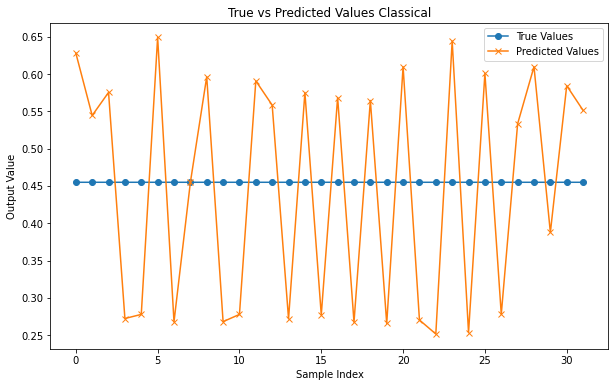

In [16]:
import matplotlib.pyplot as plt


# Make predictions
predictions = model.predict(X_val_truncated)

# Plotting
plt.figure(figsize=(10, 6))

# Plot true values
plt.plot(normalized_array[:32], label='True Values', marker='o')

# Plot predicted values
plt.plot(predictions, label='Predicted Values', marker='x')

plt.title('True vs Predicted Values Classical')
plt.xlabel('Sample Index')
plt.ylabel('Output Value')
plt.legend()
plt.show()


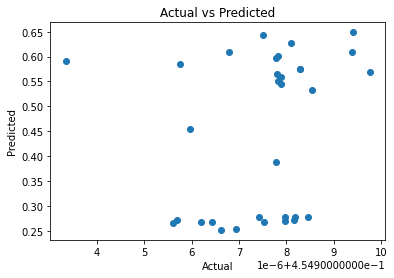

In [15]:
plt.scatter(y_val_truncated, predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

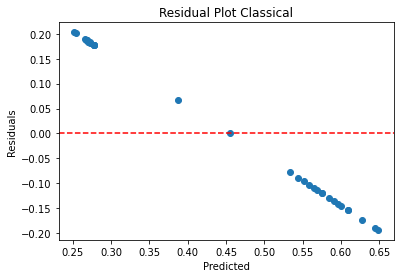

In [17]:
residuals = y_val_truncated - predictions
plt.scatter(predictions, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot Classical')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [12]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate metrics
mae = mean_absolute_error(normalized_array[:32], predictions)
mse = mean_squared_error(normalized_array[:32], predictions)
rmse = np.sqrt(mse)

# Print metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 0.14787042
Mean Squared Error (MSE): 0.024050422
Root Mean Squared Error (RMSE): 0.15508199


In [13]:
# Calculate mean of true values
mean_true_values = np.mean(normalized_array[:32])

# Calculate MAE as a fraction of the mean of true values
mae_percentage = (mae / mean_true_values) * 100

# Print percentage error
print("Mean Absolute Error (MAE) as a percentage for Classical:", mae_percentage, "%")


Mean Absolute Error (MAE) as a percentage for Classical: 32.50557482242584 %
